# EDA - Telecom Churn Prediction

In [1]:
# Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 

from pathlib import Path

%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
data = Path('data/cleaned_data.csv')

In [3]:
# load the data file into a Data Frame
df = pd.read_csv(data)
# inspect the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [5]:
# inspect the shape of the dataframe
df.shape

(7032, 21)

In [6]:
# look at the columns names of the data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# find out if there is any column with missing values and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We can observe that there are no missing values and the <code>SeniorCitizen</code> column is numeric in nature. To validate if the <code>object</code> type columns are categorical in nature, let us look at the unique value count per column 

In [8]:
df.nunique(axis=0)

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [9]:
#take a look at the central tendencies of the numerical variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

As expected, the <code>SeniorCitizen</code> column has 2 unique values and it is categorical in nature. Also, most of the variables are categorical in nature.

In [11]:
# copy the dataframe into other
df_cleaned = df.copy()
# mapping the data points in SeniorCitizen 
df_cleaned.SeniorCitizen = df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


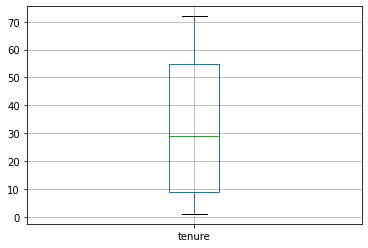

In [12]:
df_cleaned.boxplot(['tenure'])

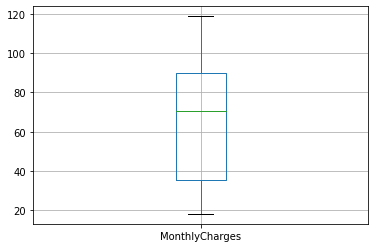

In [13]:
df_cleaned.boxplot(['MonthlyCharges'])

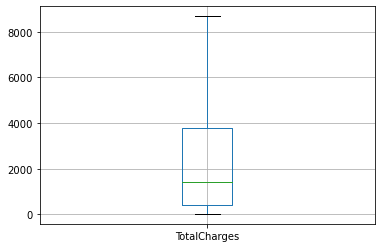

In [14]:
df_cleaned.boxplot(['TotalCharges'])

Looking at the boxplot for numerical columns, we donot seem to have outliers

### Lets look at the distribution of data for categorical columns

In [23]:
def stackedPlot(col):
    chart_data = pd.concat([df_cleaned[col],df_cleaned['customerID'],df_cleaned['Churn'],], axis=1)
    contract_data = chart_data.groupby([col,'Churn']).agg(['count']).unstack()
    contract_data = contract_data*100/len(df_cleaned)
    ax = contract_data.loc[:,'customerID'].plot.bar(stacked=True,
                                          figsize=(8,6),rot = 0,
                                         width = 0.2)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('% Customers',size = 14)
    ax.set_xlabel(col)
    ax.set_title('% churn based on '+col,size = 14)
    ax.legend(loc = 'top',prop={'size':14})

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.2f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.4*height),
                    color = 'black',
                   weight = 'bold',
                   size = 10)

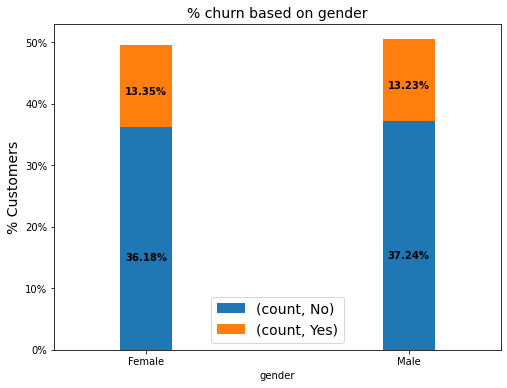

In [24]:
stackedPlot('gender')

Our data has no gender imbalance and <code>gender</code> does not seem to be a deciding factor for <code>Churn</code>.

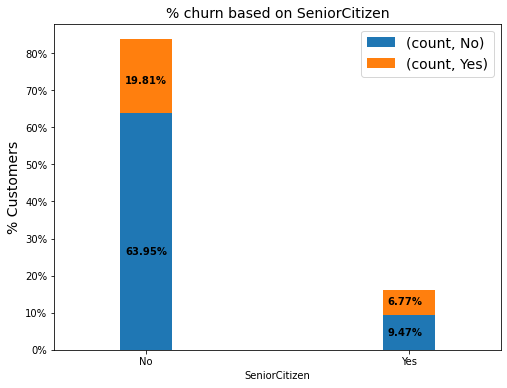

In [25]:
stackedPlot('SeniorCitizen')

Our data is highly skewed from the perspective of <code>SeniorCitizen</code> and based on the above plot, Senior Citizens tend to churn more. Lets explore it further.

In [26]:
senior_citizen = chart_data[chart_data['SeniorCitizen']=='Yes'].groupby(['SeniorCitizen','Churn']).agg(['count']).unstack()
senior_citizen

customerID     
                   count     
Churn                 No  Yes
SeniorCitizen                
Yes                  666  476

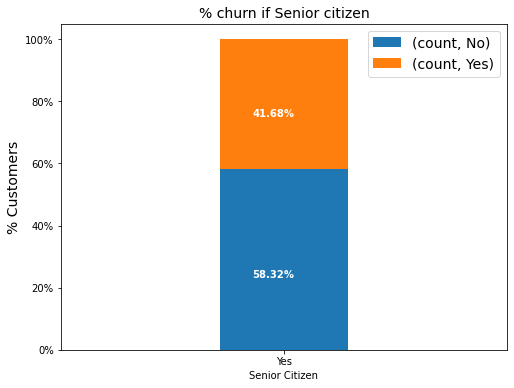

In [27]:
senior_citizen = senior_citizen*100/len(chart_data[chart_data['SeniorCitizen']=='Yes'])
ax = senior_citizen.loc[:,'customerID'].plot.bar(stacked=True, 
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Senior Citizen')
ax.set_title('% churn if Senior citizen',size = 14)
ax.legend(loc = 'top',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

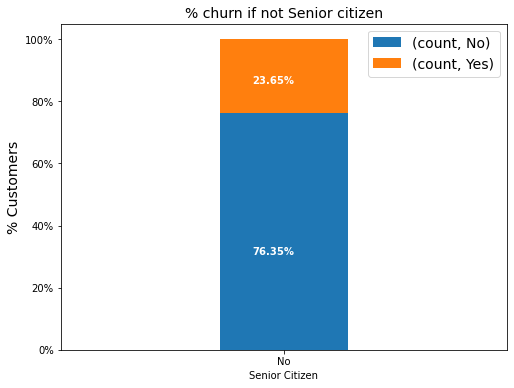

In [28]:
other_citizen = chart_data[chart_data['SeniorCitizen']=='No'].groupby(['SeniorCitizen','Churn']).agg(['count']).unstack()
other_citizen = other_citizen*100/len(chart_data[chart_data['SeniorCitizen']=='No'])
ax = other_citizen.loc[:,'customerID'].plot.bar(stacked=True, 
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Senior Citizen')
ax.set_title('% churn if not Senior citizen',size = 14)
ax.legend(loc = 'top',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

Based on the above 2 charts, we can observe that a larger percentage of <code>SeniorCitizen</code> tend to churn as compared to others. This confirms our hypothesis that <code>SeniorCitizen</code> tend to churn more. Now lets check if people with Partners tend to churn less.

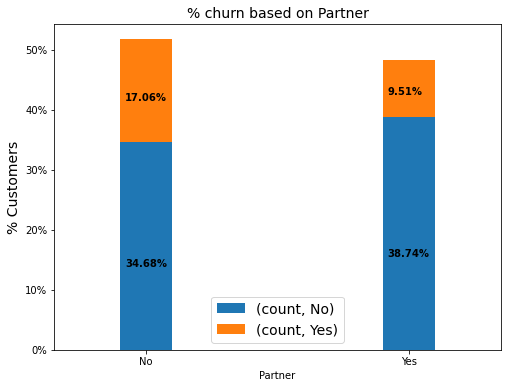

In [29]:
stackedPlot('Partner')

So our data is somewhat balanced between people having partners or not and indeed people having partners are having a less % of churn

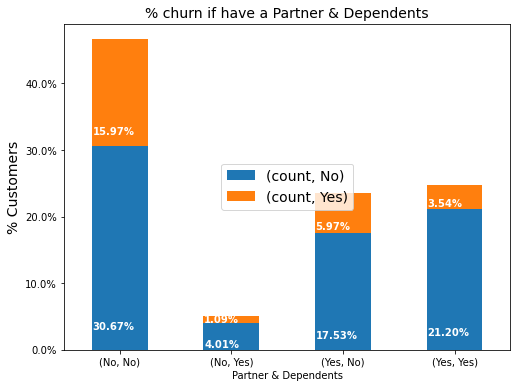

In [30]:
chart_data = pd.concat([df_cleaned['Partner'],df_cleaned['Dependents'],df_cleaned['customerID'],df_cleaned['Churn'],], axis=1)
dependent_data = chart_data.groupby(['Partner','Dependents','Churn']).agg(['count']).unstack()
dependent_data = dependent_data*100/len(df_cleaned)
ax = dependent_data.loc[:,'customerID'].plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Partner & Dependents')
ax.set_title('% churn if have a Partner & Dependents',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.01*width, p.get_y()+.1*height),
                color = 'white',
               weight = 'bold',
               size = 10)

People having no <code>Partner</code> & <code>Dependents</code> tend to churn more whereas People having <code>Partner</code> & <code>Dependents</code> are more stable

(array([851., 200., 309., 110., 254., 119., 116., 216., 109., 175.,  80.,
        184.,  73.,  71., 153.,  85., 173.,  79.,  72., 129.,  72., 134.,
         64., 153.,  50.,  65., 115.,  64., 135.,  65., 112.,  74.,  68.,
        130.,  68., 148.,  70.,  68., 144.,  65., 127.,  76., 146.,  72.,
         80., 165.,  98., 195., 119., 532.]),
 array([ 1.  ,  2.42,  3.84,  5.26,  6.68,  8.1 ,  9.52, 10.94, 12.36,
        13.78, 15.2 , 16.62, 18.04, 19.46, 20.88, 22.3 , 23.72, 25.14,
        26.56, 27.98, 29.4 , 30.82, 32.24, 33.66, 35.08, 36.5 , 37.92,
        39.34, 40.76, 42.18, 43.6 , 45.02, 46.44, 47.86, 49.28, 50.7 ,
        52.12, 53.54, 54.96, 56.38, 57.8 , 59.22, 60.64, 62.06, 63.48,
        64.9 , 66.32, 67.74, 69.16, 70.58, 72.  ]),
 <a list of 50 Patch objects>)

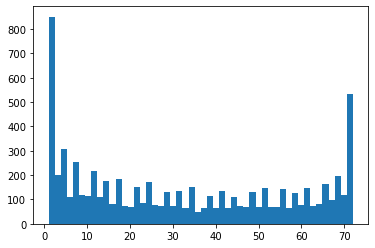

In [31]:
plt.hist(df_cleaned['tenure'], bins=50)

More customers seem to have a lower tenure. Lets explore how they churn.

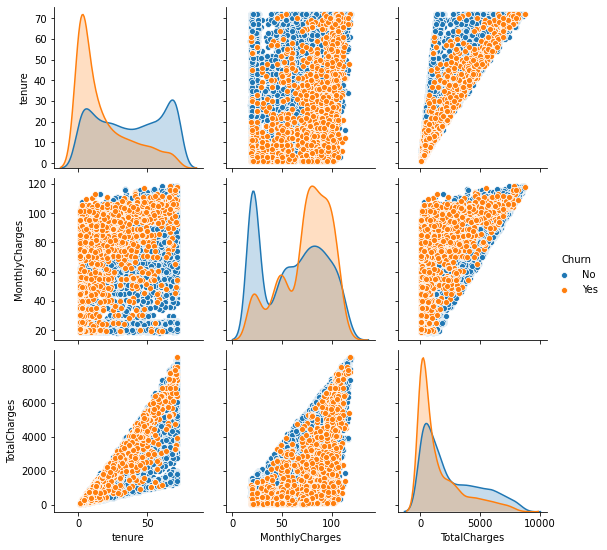

In [32]:
sns.pairplot(df_cleaned, hue='Churn')

Based on above distribution plots, we can observe that more customers having a lower tenure tend to churn more. Based on these pair plots, it is also evident that customers paying higher monthly charges tend to churn more. Let us explore the churn behavior based on the contract duration to understand the data further.

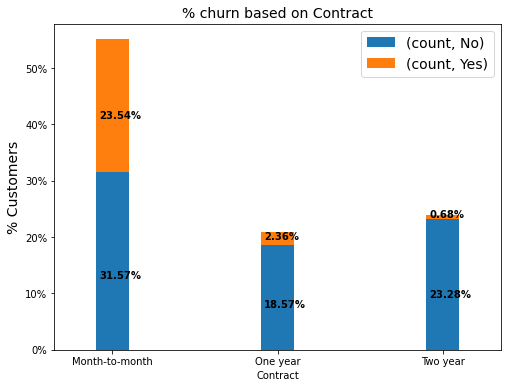

In [33]:
stackedPlot('Contract')

Based on above exploration, the customers on the Month-to-month contract tend to churn more whereas customers having higher contract duration seem to be more stable. Let us explore other services and their relationship to churn.

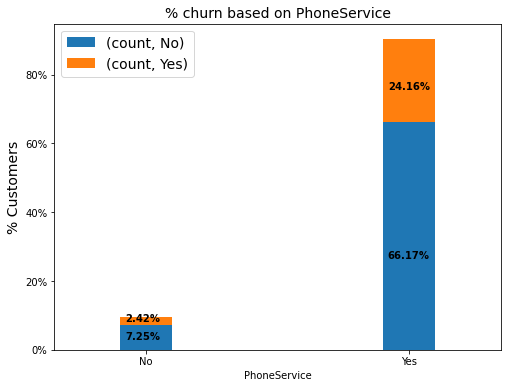

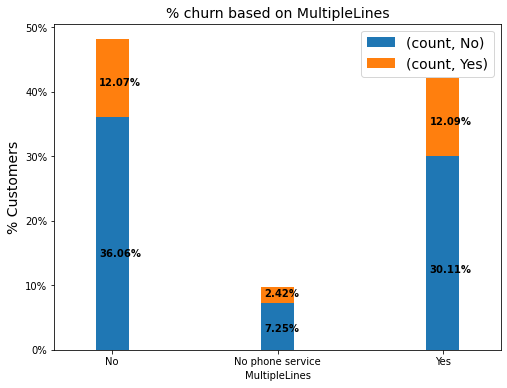

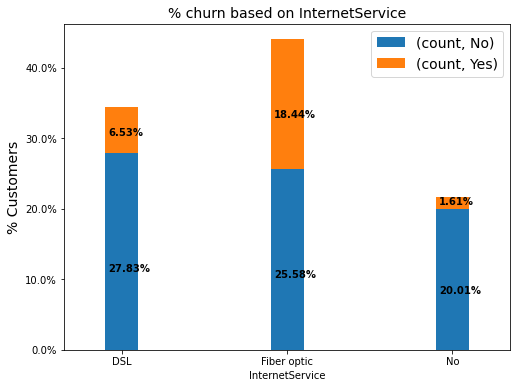

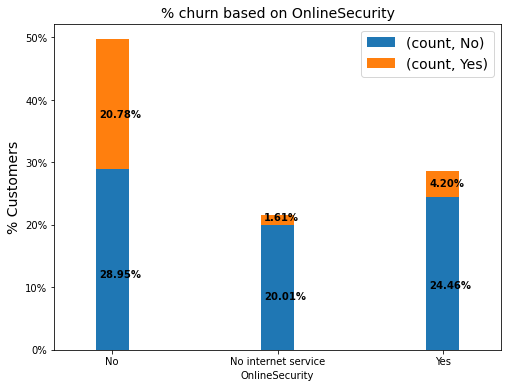

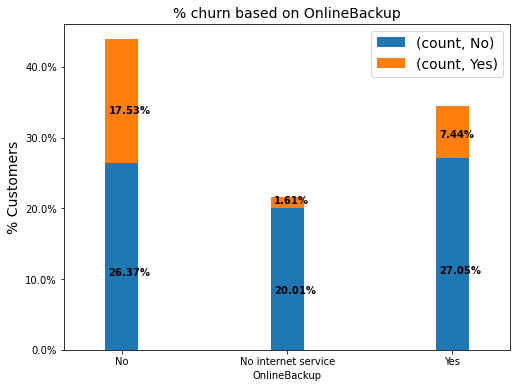

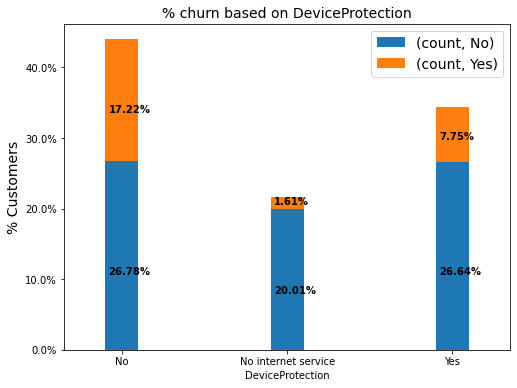

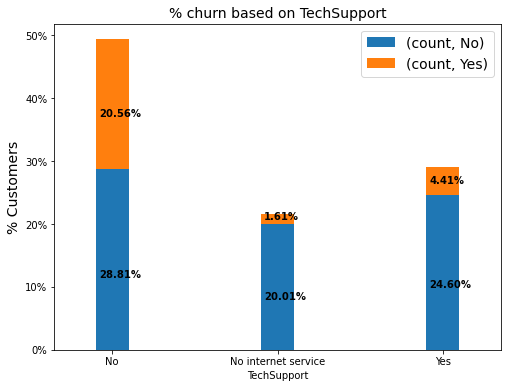

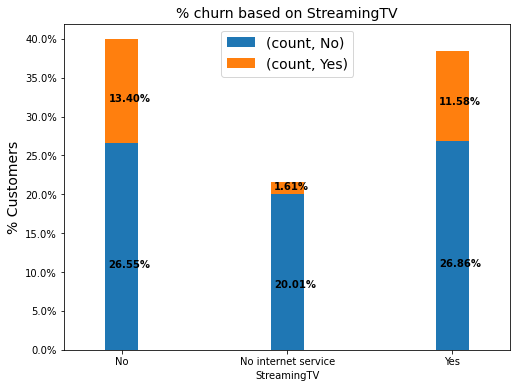

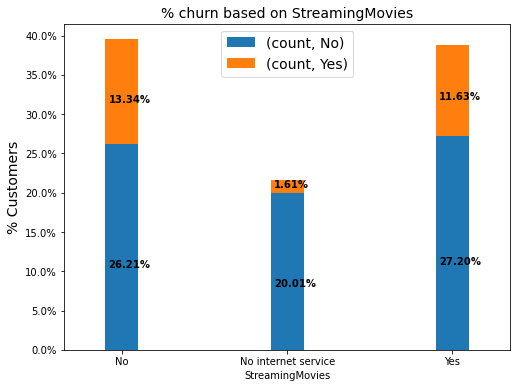

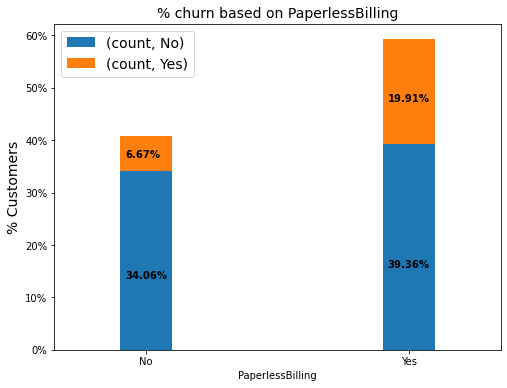

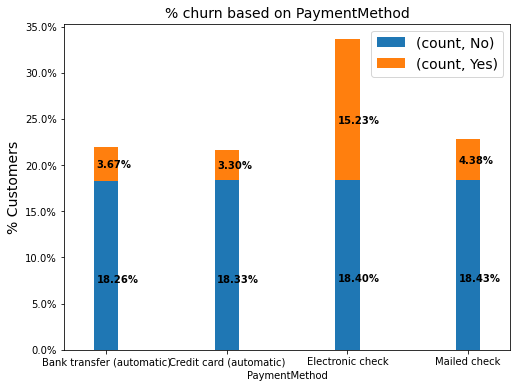

In [34]:
columnList = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
for col in columnList:
    stackedPlot(col)

Based on above exploration, the customers not using internet services tend to be churning less. Whereas those using internet services tend to churn more if they are not using aditional services such as Device Protection, Tech Support and Online Security. Also, people using paperless biling tend to churn more as compared to others. Also, customers using electronic check as the payment method tend to churn more.